In [6]:
from sklearn.datasets import load_boston
X,Y = load_boston(return_X_y=True)
print(X.shape)


(506, 13)


In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
X,y = boston.data,boston.target
X.shape, y.shape

((506, 13), (506,))

0


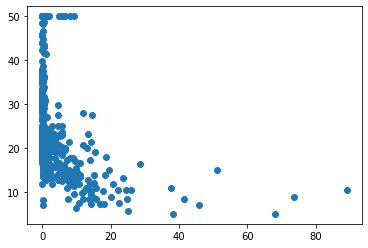

1


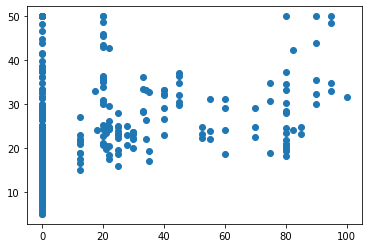

2


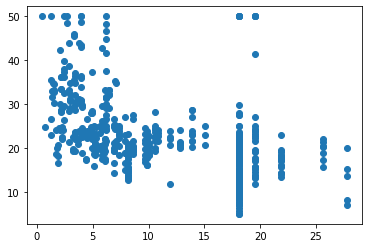

3


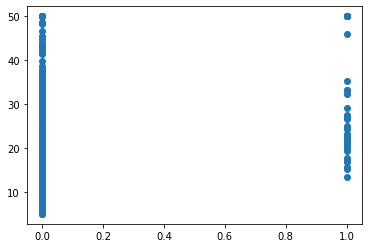

4


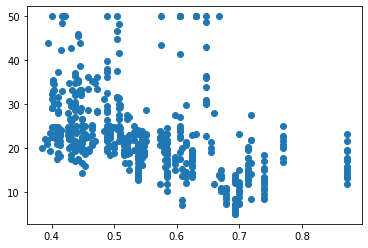

5


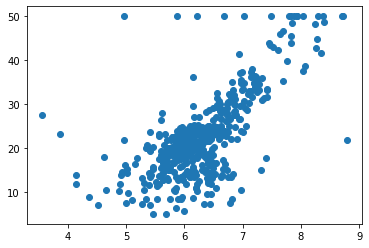

6


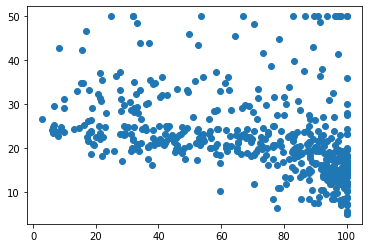

7


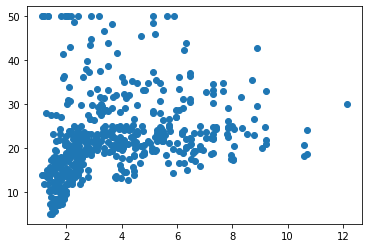

8


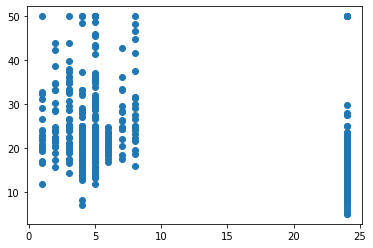

9


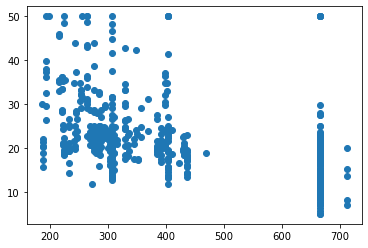

10


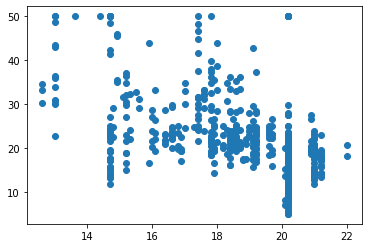

11


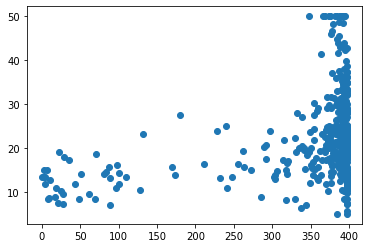

12


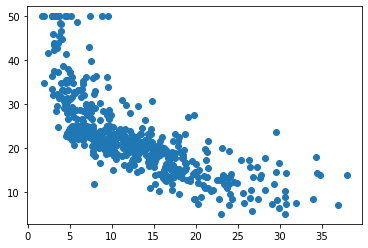

In [12]:
import matplotlib.pylab as plt
for i in range(X.shape[1]):
    print(i)
    plt.scatter(X[:,i],y)
    plt.show()

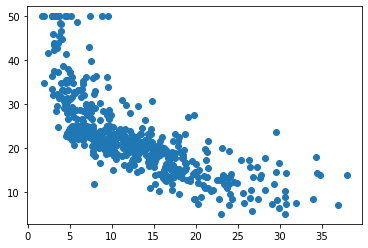

In [9]:
X12 = X[:,12:13]
plt.scatter(X12,y)
plt.show()

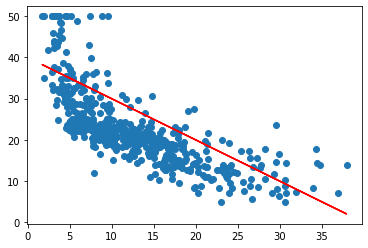

In [17]:
def modelo_linear(X,a,b):
    y = a*X+b
    return y
ypred = modelo_linear(X12,-1,40)
plt.scatter(X12,y)
plt.plot(X12,ypred,"r")
plt.show()

In [12]:
def mae(y,ypred):
    ydif = ypred - y.reshape(-1,1)
    yAbs = abs(ydif)
    erroSum = sum(yAbs)
    mae = erroSum/len(yAbs)
    return mae
ypred = modelo_linear(X12,-1,40)
mae = mae(y,ypred)
print(mae)

NameError: name 'modelo_linear' is not defined

In [13]:
def mse(y,ypred):
    ydif = ypred - y.reshape(-1,1)
    yDifSquare = ydif**2
    erroSum = sum(yDifSquare)
    mse = erroSum/len(yDifSquare)
    return mse
ypred = modelo_linear(X12,-1,40)
mse = mse(y,ypred)
print(mse)

NameError: name 'modelo_linear' is not defined

In [14]:
from math import sqrt
def rmse(y,ypred):
    ydif = ypred - y.reshape(-1,1)
    yDifSquare = ydif**2
    erroSum = sum(yDifSquare)
    mse = erroSum/len(yDifSquare)
    return sqrt(mse)
ypred = modelo_linear(X12,-1,40)
mse = rmse(y,ypred)
print(mse)

NameError: name 'modelo_linear' is not defined

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(y,ypred):
    mse = mean_squared_error(y,ypred)
    return sqrt(mse)
ypred = modelo_linear(X12,-1,40)
mse = rmse(y,ypred)
print(mse)

NameError: name 'modelo_linear' is not defined

24.334069059572577
6.20346413306178


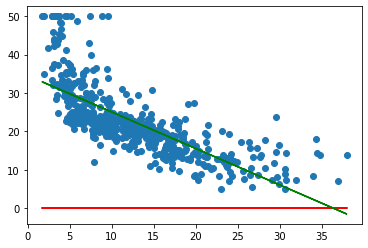

(-0.9500317226790728, 34.55355094057261)

In [43]:
#Implementando um modelo de aprendizado usando a intuição
from sklearn.metrics import mean_squared_error
class regressao_linear():
    def __init__(self):
        self.a = 0
        self.b = 0
    def fit(self,X,y):
        for _ in range(500):
            ypred = self.predict(X)

            erro = ypred - y.reshape(-1,1)
            ajusteB = (sum(erro)/len(erro))
            self.b = self.b - 0.1*ajusteB[0]

            ajusteA = (sum([erro[i]*X[i] for i in range(X.shape[0])])/sum(X))
            self.a = self.a - 0.1 * ajusteA[0]

    def predict(self, X):
        y=self.a * X + self.b
        return y
plt.scatter(X12,y)
modelo = regressao_linear()
ypred = modelo.predict(X12)
#print(mean_squared_error(y,ypred))
print(rmse(y,ypred))
plt.plot(X12,ypred,'r')

modelo.fit(X12,y)
ypred = modelo.predict(X12)
#print(mean_squared_error(y,ypred))
print(rmse(y,ypred))
plt.plot(X12,ypred,'g')
plt.show()

modelo.a,modelo.b


24.334069059572577
6.20346413306178


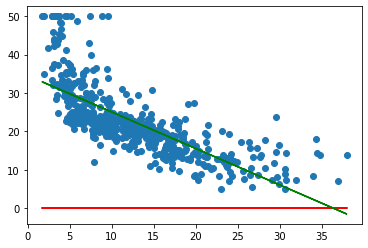

(0, 0)

In [18]:
#Implementando um modelo de aprendizado usando notação vetorial
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pylab as plt
class regressao_linear():
    def __init__(self):
        #cria uma matriz com zeros
        self.w = np.zeros((2,1))
        self.a = 0
        self.b = 0
    
    @staticmethod
    def addBias(X):
        bias = np.ones((X.shape[0],1))
        X_b=np.concatenate((bias,X),axis=1)
        return X_b

    def fit(self,X,y):
        X_b = self.addBias(X)
        for _ in range(500):
            ypred = self.predict(X)

            erro = ypred - y.reshape(-1,1)
            ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1,1)
            self.w = self.w - 0.1*ajuste

    def predict(self, X):
        X_b = self.addBias(X)
        y= X_b.dot(self.w)
        return y
plt.scatter(X12,y)
modelo = regressao_linear()
ypred = modelo.predict(X12)
#print(mean_squared_error(y,ypred))
print(rmse(y,ypred))
plt.plot(X12,ypred,'r')

modelo.fit(X12,y)
ypred = modelo.predict(X12)
#print(mean_squared_error(y,ypred))
print(rmse(y,ypred))
plt.plot(X12,ypred,'g')
plt.show()

modelo.a,modelo.b